In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.linalg import eigvals
import random
from itertools import combinations

In [30]:
def random_matrix(n):
    """
    Generate a random n by n matrix with entries from -1 to 1 and diagonals as 0.
    """
    # Generate a random n by n matrix with entries from -1 to 1
    mat = np.random.uniform(-1, 1, size=(n, n))
    A = (mat + mat.T)/2
    # Set the diagonal entries to 0
    np.fill_diagonal(A, 0)
    return A

def is_pos_def(A):
    """
    Check if a matrix is positive definite.
    """
    return np.all(np.linalg.eigvals(A) > 0)

def min_eig(A):
    """
    Compute the minimum eigenvalue of a matrix.
    """
    min_eig = np.min(eigvals(A))
    return min_eig.real

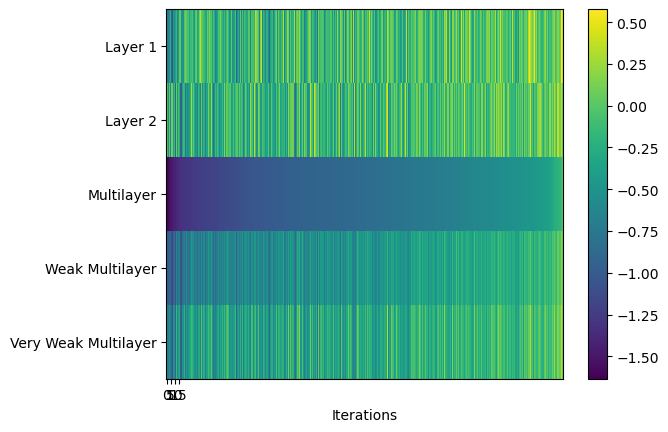

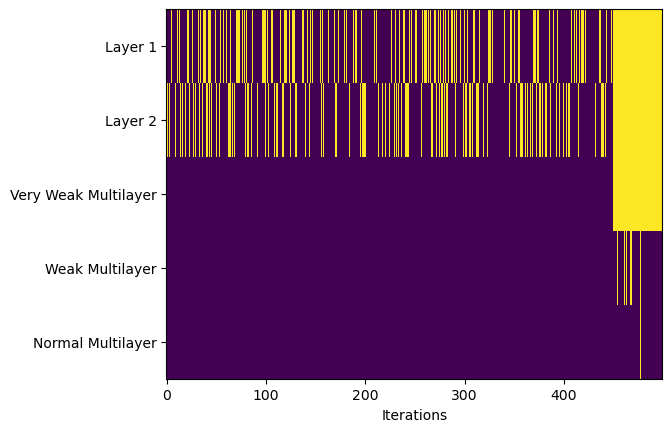

In [36]:
n = 5
kappa = 0.5
iterations = 500

def generate_matrices(n, kappa):
    """
    Generate G1, G2, and G12 matrices.
    """
    G1 = random_matrix(n)
    G2 = random_matrix(n)
    G12 = random_matrix(n)
    G21 = G12.T
    weak_G12 = kappa * G12
    weak_G21 = weak_G12.T
    very_weak_G12 = 0.1 * weak_G12
    very_weak_G21 = very_weak_G12.T

    return G1, G2, G12, G21, weak_G12, weak_G21, very_weak_G12, very_weak_G21

def generate_G(G1, G2, G12, G21):
    """
    Generate the block matrix G.
    """
    G = np.block([[G1, G12], [G21, G2]])
    return G

eig_G1 = []
eig_G2 = []
eig_G = []
eig_G_weak = []
eig_G_very_weak = []
pos_G1 = []
pos_G2 = []
pos_G = []
pos_G_weak = []
pos_G_very_weak = []
for i in range(iterations):
    G1, G2, G12, G21, weak_G12, weak_G21, very_weak_G12, very_weak_G21 = generate_matrices(n, kappa)
    G = generate_G(G1, G2, G12, G21)
    G_weak = generate_G(G1, G2, weak_G12, weak_G21)
    G_very_weak = generate_G(G1, G2, very_weak_G12, very_weak_G21)

    min_G1 = min_eig(np.identity(n) + G1)
    min_G2 = min_eig(np.identity(n) + G2)
    min_G = min_eig(np.identity(2*n) + G)
    min_G_weak = min_eig(np.identity(2*n) + G_weak)
    min_G_very_weak = min_eig(np.identity(2*n) + G_very_weak)
    eig_G1.append(min_G1)
    eig_G2.append(min_G2)
    eig_G.append(min_G)
    eig_G_weak.append(min_G_weak)
    eig_G_very_weak.append(min_G_very_weak)

    pos_G1.append(is_pos_def(np.identity(n) + G1))
    pos_G2.append(is_pos_def(np.identity(n) + G2))
    pos_G.append(is_pos_def(np.identity(2*n) + G))
    pos_G_weak.append(is_pos_def(np.identity(2*n) + G_weak))
    pos_G_very_weak.append(is_pos_def(np.identity(2*n) + G_very_weak))
    

# Plotting the heatmap
data_1 = np.array([eig_G1, eig_G2, eig_G, eig_G_weak, eig_G_very_weak])
data_2 = np.array([pos_G1, pos_G2, pos_G_very_weak, pos_G_weak, pos_G])

# sort the data with respect to the third row
sorted_data = data_1[:, data_1[2, :].argsort()]
sorted_data_2 = data_2[:, data_2[2, :].argsort()]


plt.imshow(sorted_data, cmap='viridis', interpolation='nearest', aspect='auto')

# Naming the y-ticks
plt.yticks(np.arange(5), ["Layer 1", "Layer 2", "Multilayer", "Weak Multilayer", "Very Weak Multilayer"])

plt.colorbar()
# plt.title('Determinants of Submatrices')
plt.xlabel('Iterations')
plt.xticks(np.arange(0, 20, 5), np.arange(0, 20, 5))
# plt.ylabel('Matrices')
# plt.savefig('test-prop9.png')
plt.show()





plt.imshow(sorted_data_2, cmap='viridis', interpolation='nearest', aspect='auto')

# Naming the y-ticks
plt.yticks(np.arange(5), ["Layer 1", "Layer 2", "Very Weak Multilayer", "Weak Multilayer", "Normal Multilayer"])

# plt.colorbar()
# plt.title('Determinants of Submatrices')
plt.xlabel('Iterations')
# plt.ylabel('Matrices')
# plt.savefig('test-prop9.png')
plt.show()
